<a href="https://colab.research.google.com/github/Tai-Rocha/Python_Init/blob/main/Copy_of_C%C3%B3pia_de_M3_5_Plotando_mapas_de_maneira_autom%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automatizando produção de mapas**

* Base SIDRA
* Ajustando Dataframe
* Merge de bases 
* Ajustando geodataframe
* Estrutura (loop) para plotar os mapas

# **Instalação das bibliotecas**

In [ ]:
###Instalando as bibliotecas 
!pip install sidrapy geopandas rtree descartes matplotlib-scalebar contextily -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 3.6 MB/s eta 0:00:00


In [ ]:
##Importar as bibliotecas
import geopandas as gpd 
##Plots
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
##Base de dados sidra
import sidrapy
##O basemap do contextily
import contextily as ctx

# **Trabalhando com a base SIDRA py**

In [ ]:
##SIDRA - consultar https://servicodados.ibge.gov.br/api/docs/agregados?versao=3#api-bq
## Queremos chegar neste resultado- https://sidra.ibge.gov.br/tabela/1612#resultado
##Acesse o SIDRA https://sidra.ibge.gov.br/home/ipca15/brasil
df = sidrapy.get_table(table_code='1612',
                       territorial_level='9',
                       ibge_territorial_code='all',
                       period='last 20',
                       variable='214',
                       classification='81/2713')
df.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Microrregião Geográfica (Código),Microrregião Geográfica,Ano (Código),Ano,Variável (Código),Variável,Produto das lavouras temporárias (Código),Produto das lavouras temporárias
1,9,Microrregião Geográfica,1017,Toneladas,138,11001,Porto Velho - RO,2002,2002,214,Quantidade produzida,2713,Soja (em grão)
2,9,Microrregião Geográfica,1017,Toneladas,-,11001,Porto Velho - RO,2003,2003,214,Quantidade produzida,2713,Soja (em grão)
3,9,Microrregião Geográfica,1017,Toneladas,-,11001,Porto Velho - RO,2004,2004,214,Quantidade produzida,2713,Soja (em grão)
4,9,Microrregião Geográfica,1017,Toneladas,1365,11001,Porto Velho - RO,2005,2005,214,Quantidade produzida,2713,Soja (em grão)


In [ ]:
# Substitui as colunas pela primeira observação
df.columns=df.iloc[0]

# Retira a primeira observação
df = df.iloc[1:,:]
df.head()

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Microrregião Geográfica (Código),Microrregião Geográfica,Ano (Código),Ano,Variável (Código),Variável,Produto das lavouras temporárias (Código),Produto das lavouras temporárias
1,9,Microrregião Geográfica,1017,Toneladas,138,11001,Porto Velho - RO,2002,2002,214,Quantidade produzida,2713,Soja (em grão)
2,9,Microrregião Geográfica,1017,Toneladas,-,11001,Porto Velho - RO,2003,2003,214,Quantidade produzida,2713,Soja (em grão)
3,9,Microrregião Geográfica,1017,Toneladas,-,11001,Porto Velho - RO,2004,2004,214,Quantidade produzida,2713,Soja (em grão)
4,9,Microrregião Geográfica,1017,Toneladas,1365,11001,Porto Velho - RO,2005,2005,214,Quantidade produzida,2713,Soja (em grão)
5,9,Microrregião Geográfica,1017,Toneladas,1706,11001,Porto Velho - RO,2006,2006,214,Quantidade produzida,2713,Soja (em grão)


In [ ]:
##Analisando colunas 
df.columns

Index(['Nível Territorial (Código)', 'Nível Territorial',
       'Unidade de Medida (Código)', 'Unidade de Medida', 'Valor',
       'Microrregião Geográfica (Código)', 'Microrregião Geográfica',
       'Ano (Código)', 'Ano', 'Variável (Código)', 'Variável',
       'Produto das lavouras temporárias (Código)',
       'Produto das lavouras temporárias'],
      dtype='object', name=0)

In [ ]:
##Ajustando dados 
df = df[['Nível Territorial (Código)', 'Nível Territorial',
       'Unidade de Medida (Código)', 'Unidade de Medida', 'Valor',
       'Microrregião Geográfica (Código)', 'Microrregião Geográfica',
       'Ano (Código)', 'Ano', 'Variável (Código)', 'Variável',
       'Produto das lavouras temporárias (Código)',
       'Produto das lavouras temporárias']]
df.head()

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Microrregião Geográfica (Código),Microrregião Geográfica,Ano (Código),Ano,Variável (Código),Variável,Produto das lavouras temporárias (Código),Produto das lavouras temporárias
1,9,Microrregião Geográfica,1017,Toneladas,138,11001,Porto Velho - RO,2002,2002,214,Quantidade produzida,2713,Soja (em grão)
2,9,Microrregião Geográfica,1017,Toneladas,-,11001,Porto Velho - RO,2003,2003,214,Quantidade produzida,2713,Soja (em grão)
3,9,Microrregião Geográfica,1017,Toneladas,-,11001,Porto Velho - RO,2004,2004,214,Quantidade produzida,2713,Soja (em grão)
4,9,Microrregião Geográfica,1017,Toneladas,1365,11001,Porto Velho - RO,2005,2005,214,Quantidade produzida,2713,Soja (em grão)
5,9,Microrregião Geográfica,1017,Toneladas,1706,11001,Porto Velho - RO,2006,2006,214,Quantidade produzida,2713,Soja (em grão)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Manipulando arquivos vetoriais**

In [ ]:
# Carrega o arquivo shapefile com os dados dos estados brasileiros
gdf = gpd.read_file('/content/drive/MyDrive/BASES/BR_Municipios_2021.shp')
gdf.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."


# **Unir a base df e gdf**

In [ ]:
##Juntando a base de dados 
merge = df.merge(gdf, how='left', left_on='Microrregião Geográfica', right_on='NM_MUN')
merge = merge.rename(columns={'Produto das lavouras temporárias':'Lavoura'})
merge = merge.replace({'-':0})
merge = merge.replace({'...':0})
merge = df.merge(gdf, how= 'left', left_on='Microrregião Geográfica', right_on='SIGLA')
merge['Valor']=merge['Valor'].astype(int).astype(float)
merge

ValueError: ignored

In [ ]:
##Arrumando os dados para fazer a leitura por coluna
df_ano = merge.pivot_table(values='Valor', index=['NM_MUN'], columns='Ano')
df_ano.columns = df_ano.columns.get_level_values(0)
df_ano.head()

Ano
NM_MUN


In [ ]:
# Gerar o merge com geodataframe novamente 
merged1= gdf.set_index('NM_MUN').join(df_ano)
merged1= merged1.reindex(merged1.index).reset_index()
merged1

,NM_MUN,CD_MUN,SIGLA,AREA_KM2,geometry
0,Alta Floresta D'Oeste,1100015,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,Ariquemes,1100023,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,Cabixi,1100031,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,Cacoal,1100049,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,Cerejeiras,1100056,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."
...,...,...,...,...,...
5567,Vianópolis,5222005,GO,954.115,"POLYGON ((-48.42801 -16.62789, -48.42803 -16.6..."
5568,Vicentinópolis,5222054,GO,733.794,"POLYGON ((-49.84740 -17.57796, -49.84719 -17.5..."
5569,Vila Boa,5222203,GO,1052.593,"POLYGON ((-47.10998 -14.67195, -47.10994 -14.6..."
5570,Vila Propício,5222302,GO,2181.593,"POLYGON ((-48.75572 -14.86393, -48.75502 -14.8..."


# **Mapa base - exemplo**

In [ ]:
##Plotando um mapa e depois reproduzir análise em um loop
filtro = merged1[['NM_MUN','geometry','SIGLA']]
filtro.head()

,NM_MUN,geometry,SIGLA
0,Alta Floresta D'Oeste,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",RO
1,Ariquemes,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",RO
2,Cabixi,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",RO
3,Cacoal,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...",RO
4,Cerejeiras,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...",RO


In [ ]:
##informações sobre nosso shp
filtro.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
##Definindo parâmetros para escala
x_min, y_min, x_max, y_max = gdf.total_bounds
#Calcule a extensão geográfica do Brasil em SIRGAS 2000:
brasil_width = x_max - x_min
brasil_width

45.14281005499994

In [ ]:
##Qual o máximo e mínimo produzido
max = merge['Valor'].astype(float).std()
min = merge['Valor'].astype(float).median()
print(max)
print(min)

nan
nan


KeyError: ignored

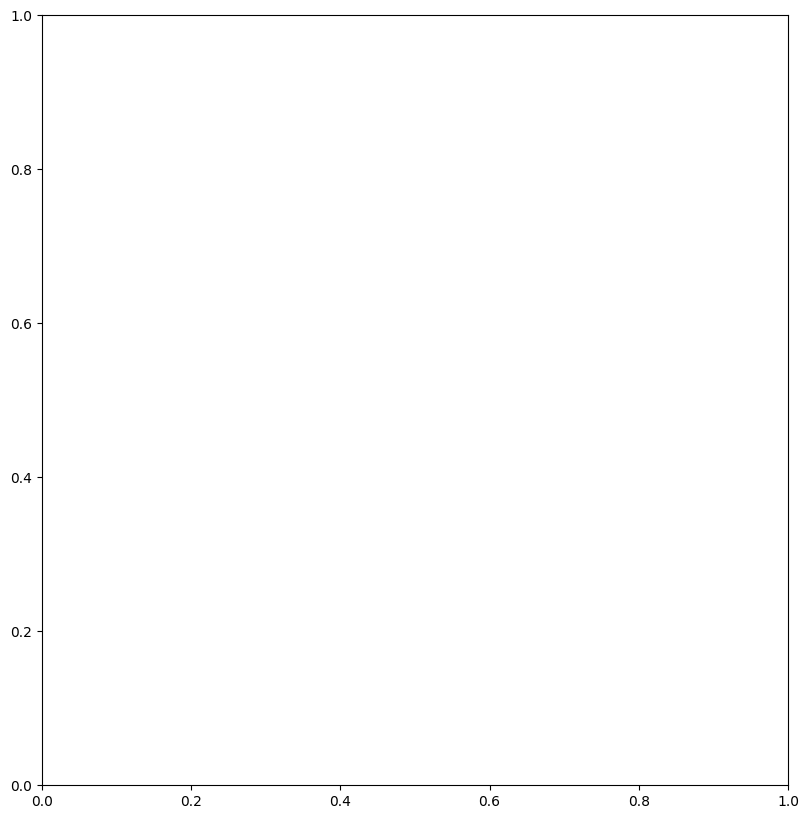

In [ ]:
##Definição do ano
year = '2021'

##Definir o tamanho da figura 
fig, ax = plt.subplots(figsize=(15,10))

##Defindo o mapa base aqui vamos inserir o geodataframe para ser plotado
base = merged1.plot(ax=ax,
                    column=year,
                    cmap='RdYlGn_r',
                    legend=True,
                    linewidth=0.3,
                    edgecolor='black',
                    alpha=0.6,
                    norm=plt.Normalize(vmin=min, vmax=max),
                    legend_kwds={'label': 'Quantidade produzida(toneladas)',
                                 'orientation': "vertical"})

##Adicionar um basemap ao fundo -https://contextily.readthedocs.io/en/latest/intro_guide.html
ctx.add_basemap(base, source=ctx.providers.Esri.WorldGrayCanvas, crs=gdf.crs.to_string())

##Criando escala
##Vamos usar 'a distância' do bounds para calcular nossa escala em km  
scalebar = ScaleBar(brasil_width, 'km', label='Escala', 
                      font_properties={'family':'serif', 'size': 'large'}, 
                      location='lower right', box_alpha=0.3)
  
##Adicionando a escala na figura
ax.add_artist(scalebar)

##Vamos adicionar o norte
x, y, arrow_length = 0.95, 0.99, 0.1
##Usando uma anotação de x e y
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
  
##Estabelecendo o título. Nesta caso usamos o format para vincular o ano  
ano= year
ax.set_title(f'Quantidade produzida de soja (toneladas) \n Ano - {ano}', fontsize=20)

##Adicionar informações ao texto
ax.text(0.015,0.05,'CGS LAT/LONG SIRGAS 2000''\n Fonte: SIDRA(IBGE) \n Autor: Christhian Cunha',
        transform=ax.transAxes, fontsize= 12, bbox = dict(facecolor = 'white'))
##Salvando a figura como jpeg
plt.savefig(f'Soja_tonelas{year}.jpg',dpi=300,bbox_inches="tight")
##Visualizando os mapas
plt.show()

# **Preparando loop**

In [ ]:
# Cria uma lista com os anos presentes no dataframe
years = df['Ano'].unique().tolist()
years

['2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

KeyError: ignored

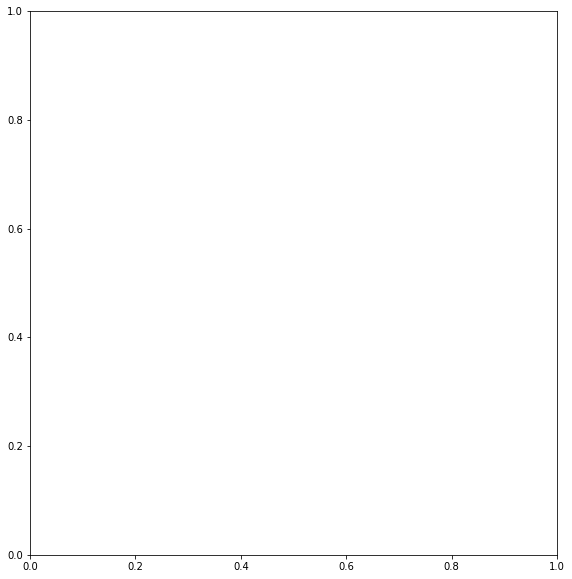

In [ ]:
##Estrutura para plotar mapa por ano 
for year in years:

  ##Definir o tamanho da figura 
  fig, ax = plt.subplots(figsize=(15, 10))

  ##Defindo o mapa base aqui vamos inserir o geodataframe para ser plotado
  base = merged1.plot(ax=ax,
                      column=year, 
                      cmap='RdYlGn_r',
                      legend=True, linewidth=0.3,edgecolor='black',
                      alpha=0.6,
                      norm=plt.Normalize(vmin=min, vmax=max),
                      legend_kwds={'label': 'Quantidade produzida(toneladas)','orientation': "vertical"})

  ##Adicionar um basemap ao fundo 
  ctx.add_basemap(base, source=ctx.providers.Esri.WorldGrayCanvas, crs=gdf.crs.to_string())

  ##Criando escala
  ##Vamos usar 'a distância' do bounds para calcular nossa escala em km  
  scalebar = ScaleBar(brasil_width, 'km', label='Escala', 
                      font_properties={'family':'serif', 'size': 'large'}, 
                      location='lower right', box_alpha=0.3)
  
  ##Adicionando a escala na figura
  ax.add_artist(scalebar)

  ##Vamos adicionar o norte
  x, y, arrow_length = 0.95, 0.99, 0.1

  ##Usando uma anotação de x e y
  ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

  
  ##Estabelecendo o título. Nesta caso usamos o format para vincular o ano  
  ano= year
  ax.set_title(f'Quantidade produzida de soja (toneladas) \n Ano - {ano}', fontsize=20)

  ##Adicionar informações ao texto
  ax.text(0.015,0.05,'CGS LAT/LONG SIRGAS 2000''\n Fonte: SIDRA(IBGE) \n Autor: Christhian Cunha',
          transform=ax.transAxes, fontsize= 12, bbox = dict(facecolor = 'white'))
  ##Salvando a figura como jpeg
  plt.savefig(f'/content/drive/MyDrive/Mapas_Soja_Brasil/Soja_tonelas{year}.jpg',dpi=300,bbox_inches="tight")
  ##Visualizando os mapas
  plt.show()